<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,8)})

# feel free to import other libraries! 

In [128]:
df = pd.read_csv('../data/states_edu.csv')

Chosen test: AVG_TOTAL_8_SCORE

I made it up! It's just the math and reading scores for 8th grade added together :) It represents an "overall picture" of 8th grade test scores.

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [129]:
df['AVG_TOTAL_8_SCORE'] = df['AVG_MATH_8_SCORE'] + df['AVG_READING_8_SCORE']
df['CASH_FLOW_RATIO'] = df['TOTAL_REVENUE'] / df['TOTAL_EXPENDITURE']

Final feature list: Year|Ratio of revenue to expenses

Feature selection justification: Plotting test scores by year gives a pretty good overview of how scores have been changing over time. I also chose to examine the ratio of revenue to expenses to see if there's a correlation between test scores and positive/negative cash flow.

<h2> EDA </h2>

Visualization 1

<AxesSubplot:xlabel='YEAR', ylabel='AVG_MATH_8_SCORE'>

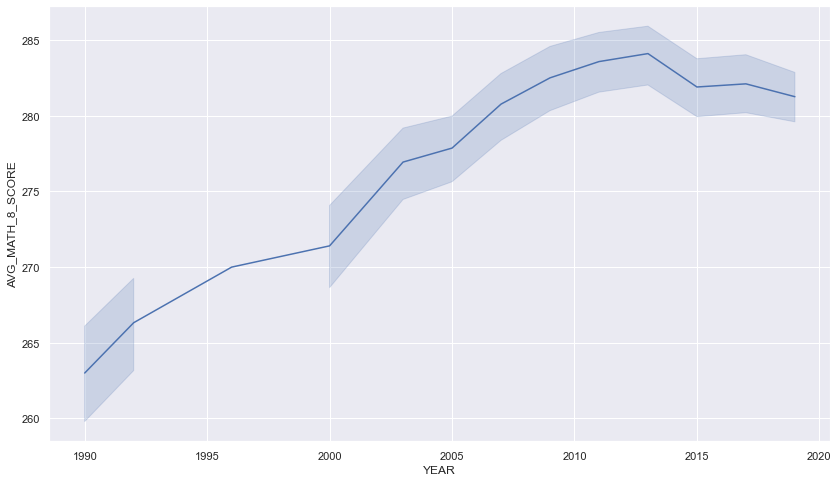

In [130]:
sns.lineplot(data=df, x='YEAR', y='AVG_MATH_8_SCORE')

We're starting off with a nice, easy visualization to warm up the data analysis. Just a general trend of the 8th grade math scores over time. It looks like scores were steadily rising from 1990 until they peaked in 2013, at which point they began trending downward. I included the 8th grade reading scores just for funzies and it looks like reading follows a somewhat similar trend.

I don't know if they are related, but I remember Common Core was just getting into schools in the early 2010s. Many people were criticizing Common Core for forcing students to use seemingly less effective mathematical methods. I don't have any data to check this, but I wonder if they are related...

Visualization 2

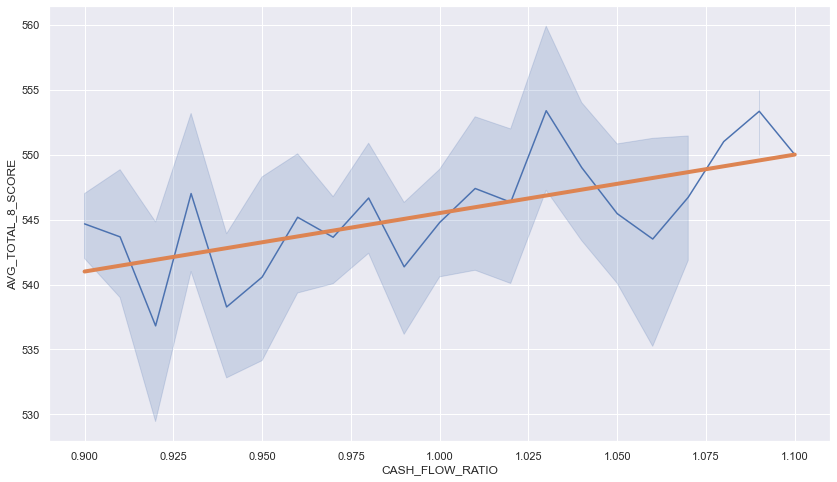

In [131]:
df = df.round({'CASH_FLOW_RATIO':2})
df = df[df['CASH_FLOW_RATIO'].ge(0.9) & df['CASH_FLOW_RATIO'].le(1.1)]
sns.lineplot(data=df, x='CASH_FLOW_RATIO', y='AVG_TOTAL_8_SCORE')
plt.plot([0.9, 1.1], [541, 550], linewidth=4)

From a revenue/expense ratio of ~0.9 to ~1.1, it looks like there is a positive trend of test scores. That seems to make sense, as schools with excess cash should have enough money to provide their students with all of the resources they need to succeed. An approximate trend line was added to show the increasing scores.

Ratios below 0.9 and above 1.1 are infrequent and I generally don't feel confident in the trends outside of the range 0.9 < ratio < 1.1. I made the decision to trim those values to make the graph look a bit better and improve the regression in the next step. In a real dataset, I might be inclined to look into why the data points are outliers to make sure that trimming the data was valid, but right now I'm not going to worry about it.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X = df[['YEAR', 'ENROLL', 'TOTAL_REVENUE', 'TOTAL_EXPENDITURE', 'CASH_FLOW_RATIO', 'AVG_TOTAL_8_SCORE']].dropna()
X.drop('AVG_TOTAL_8_SCORE', axis=1, inplace=True)
y = df.loc[X.index]['AVG_TOTAL_8_SCORE']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=0)

<h2> Prediction </h2>

Chosen ML task: Regression

In [135]:
# import your sklearn class here
from sklearn import linear_model

In [136]:
# create your model here
model = linear_model.LinearRegression()

In [137]:
model.fit(X_train, y_train)

LinearRegression()

In [138]:
y_pred = model.predict(X_test)

In [139]:
# FOR CLASSIFICATION ONLY:
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(model, X_test, y_test,
#                         cmap=plt.cm.Blues)

Text(0, 0.5, 'AVG_TOTAL_8_SCORE')

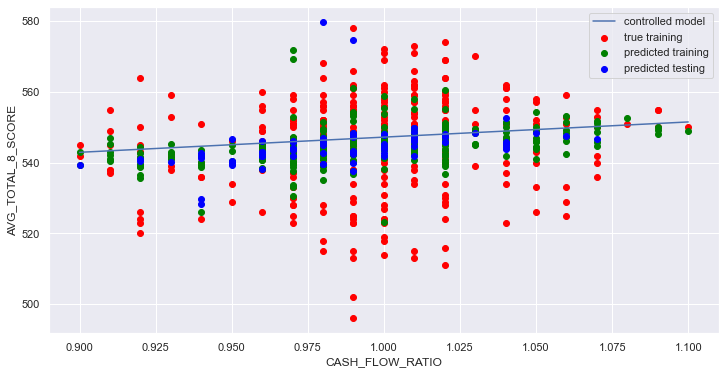

In [140]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'CASH_FLOW_RATIO'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_TOTAL_8_SCORE')

<h2> Summary </h2>

We began by looking at the data, interpreting what each column represented and getting an overall feel for potential relationships in the data. I decided to make a new test value to measure against (AVG_TOTAL_8_SCORE) representing the average 8th grade student score for math and reading combined. I also created a new feature to explore (CASH_FLOW_RATIO) which gave us the ratio between revenue and expenses. I then performed some basic EDA to see if there were any relationships between year/CASH_FLOW_RATIO and the resulting test scores, and found a positive correlation for both. Finally, I trained a linear regression model on the data using several features that was able to predict the positive correlation between CASH_FLOW_RATIO and the associated AVG_TOTAL_8_SCORE values.